<a href="https://www.kaggle.com/code/zafarali27/eda-social-media?scriptVersionId=212932330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-usage-datasetapplications/social_media_usage.csv


# importing library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/social-media-usage-datasetapplications/social_media_usage.csv")



In [4]:
df.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [5]:
print(f"Data rows :{df.shape[0]}\nData columns : {df.shape[1]}")

Data rows :1000
Data columns : 6


# Exploratory Data Analysis


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   App                  1000 non-null   object
 2   Daily_Minutes_Spent  1000 non-null   int64 
 3   Posts_Per_Day        1000 non-null   int64 
 4   Likes_Per_Day        1000 non-null   int64 
 5   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [7]:
df.isnull().mean() *100

User_ID                0.0
App                    0.0
Daily_Minutes_Spent    0.0
Posts_Per_Day          0.0
Likes_Per_Day          0.0
Follows_Per_Day        0.0
dtype: float64

In [8]:
df.describe()

,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.368000,10.269000,94.682000,24.698000
std,146.371921,6.121774,57.560943,14.842948
min,5.000000,0.000000,0.000000,0.000000
25%,112.750000,5.000000,44.750000,12.000000
50%,246.000000,10.000000,94.000000,24.000000
75%,380.500000,16.000000,142.000000,38.000000
max,500.000000,20.000000,200.000000,50.000000


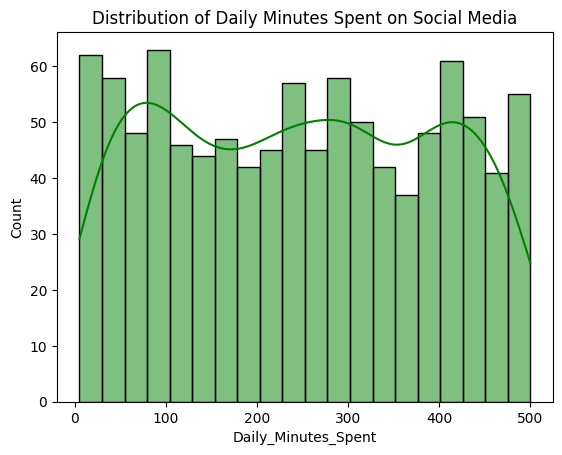

In [9]:
sns.histplot(x = "Daily_Minutes_Spent", data = df, kde=True, color="green",bins=20)
plt.title('Distribution of Daily Minutes Spent on Social Media')
plt.show()

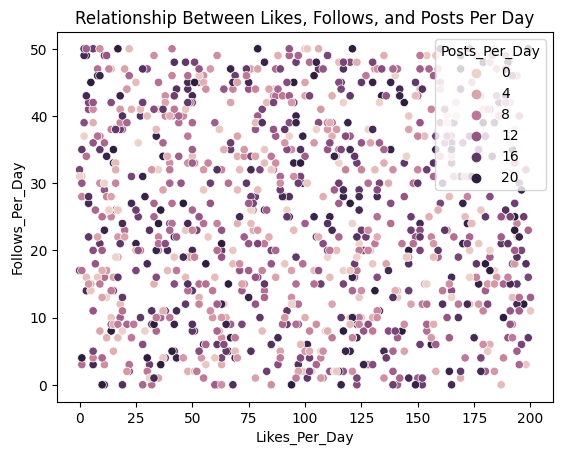

In [10]:
sns.scatterplot(x='Likes_Per_Day', y='Follows_Per_Day',hue='Posts_Per_Day', data=df, marker="o")
plt.title("Relationship Between Likes, Follows, and Posts Per Day")
plt.show()

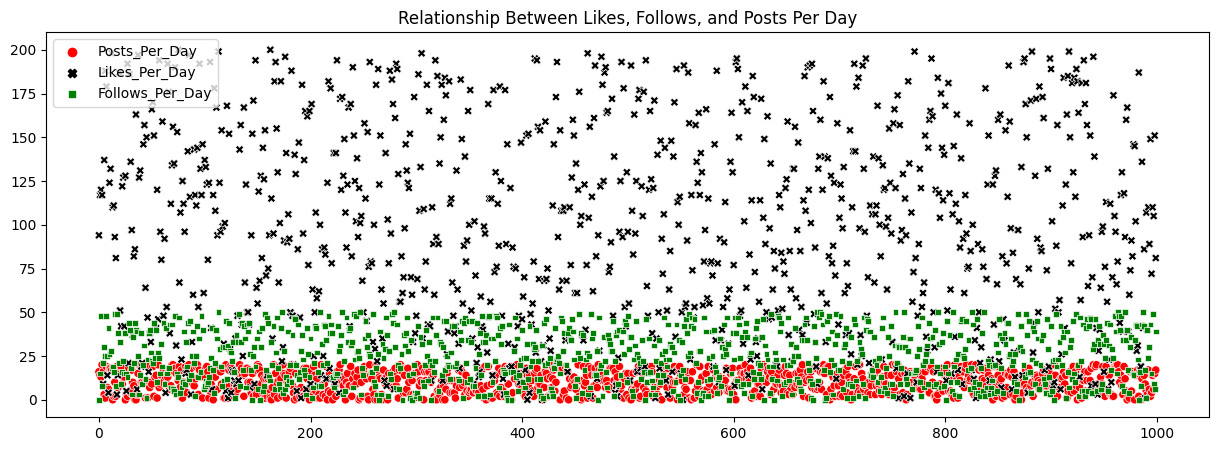

In [11]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = df[["Posts_Per_Day",'Likes_Per_Day','Follows_Per_Day']],palette=["red", "black", "green"])
plt.title("Relationship Between Likes, Follows, and Posts Per Day")
plt.show()

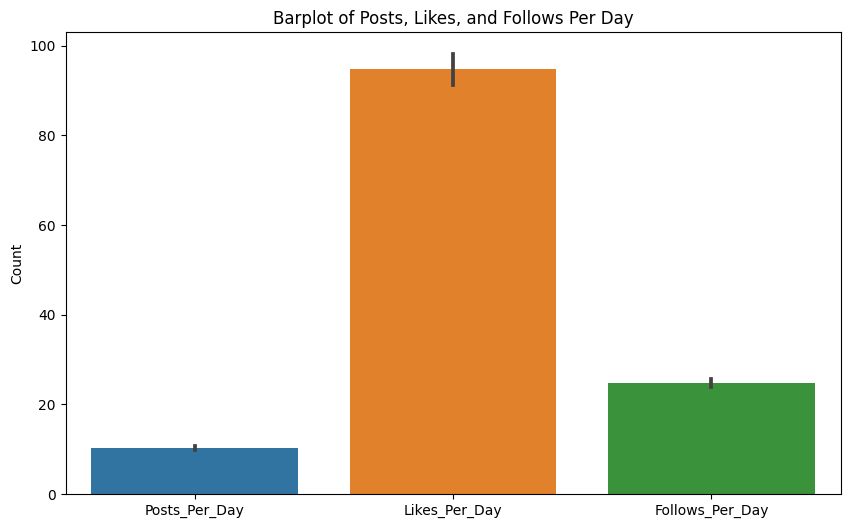

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df[["Posts_Per_Day",'Likes_Per_Day','Follows_Per_Day']])
plt.title("Barplot of Posts, Likes, and Follows Per Day")
plt.ylabel('Count')
plt.show()

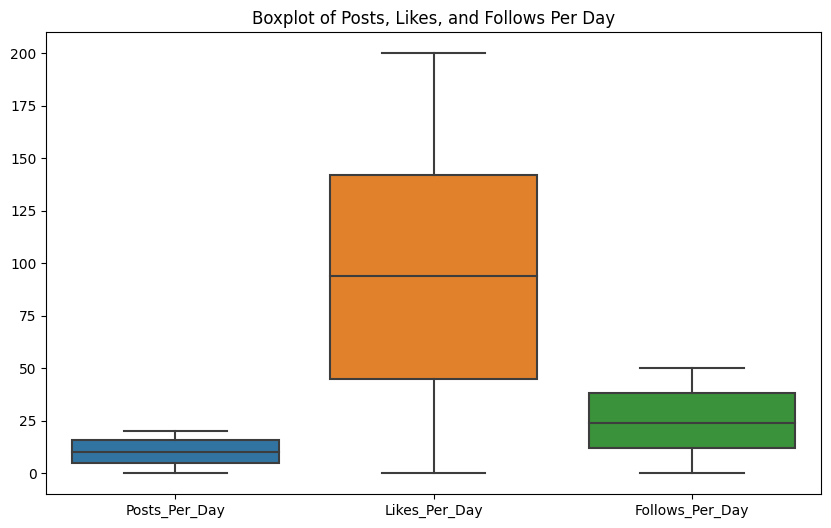

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df[[ 'Posts_Per_Day',
       'Likes_Per_Day', 'Follows_Per_Day' ]])
plt.title("Boxplot of Posts, Likes, and Follows Per Day")
plt.show()

<Axes: title={'center': 'App Counts'}, xlabel='App'>

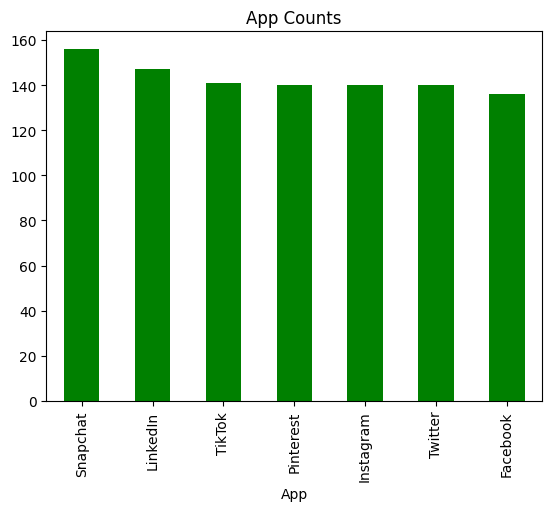

In [14]:
df["App"].value_counts().plot(kind = "bar",color = "green",title = "App Counts")

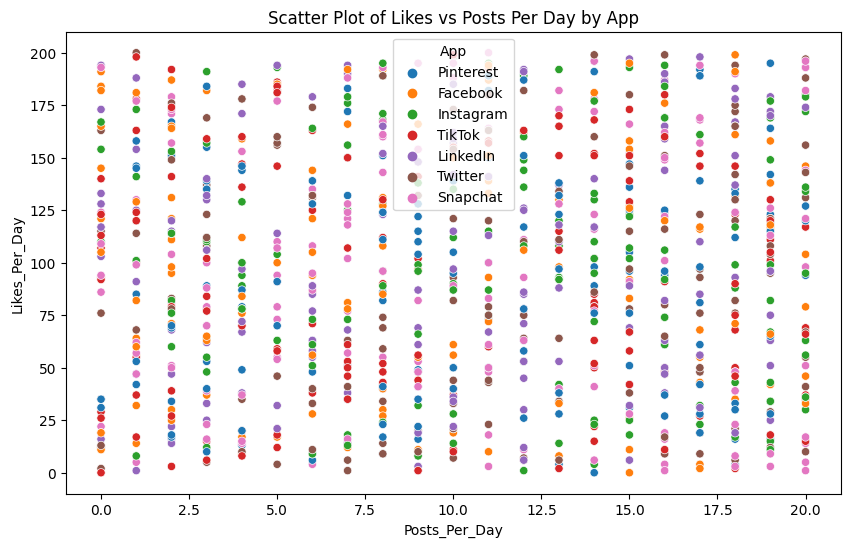

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Posts_Per_Day", y="Likes_Per_Day", data=df, hue="App")
plt.title("Scatter Plot of Likes vs Posts Per Day by App")
plt.show()

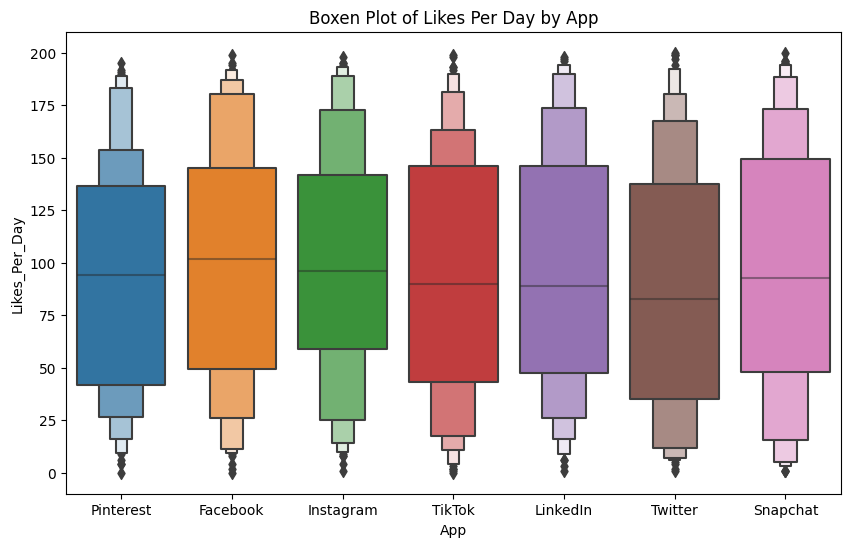

In [16]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x="App", y="Likes_Per_Day", data=df)
plt.title("Boxen Plot of Likes Per Day by App")
plt.show()


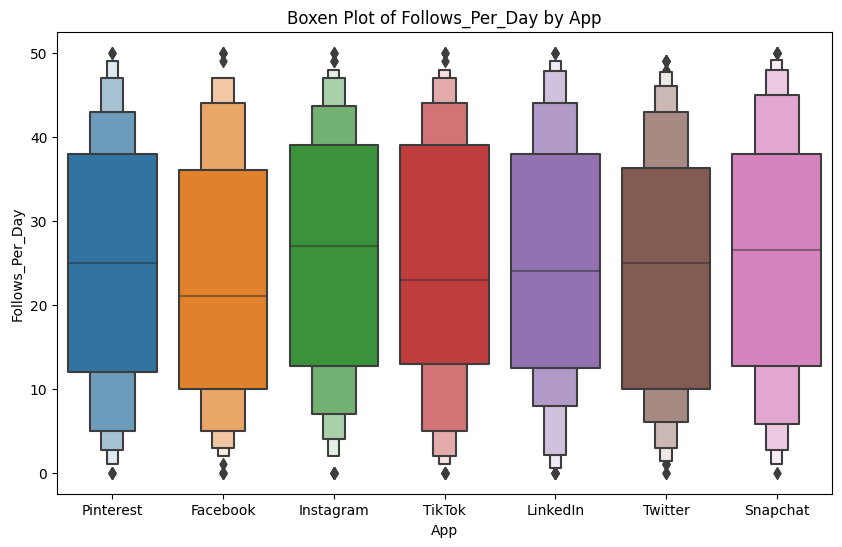

In [17]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x="App", y="Follows_Per_Day", data=df)
plt.title("Boxen Plot of Follows_Per_Day by App")
plt.show()

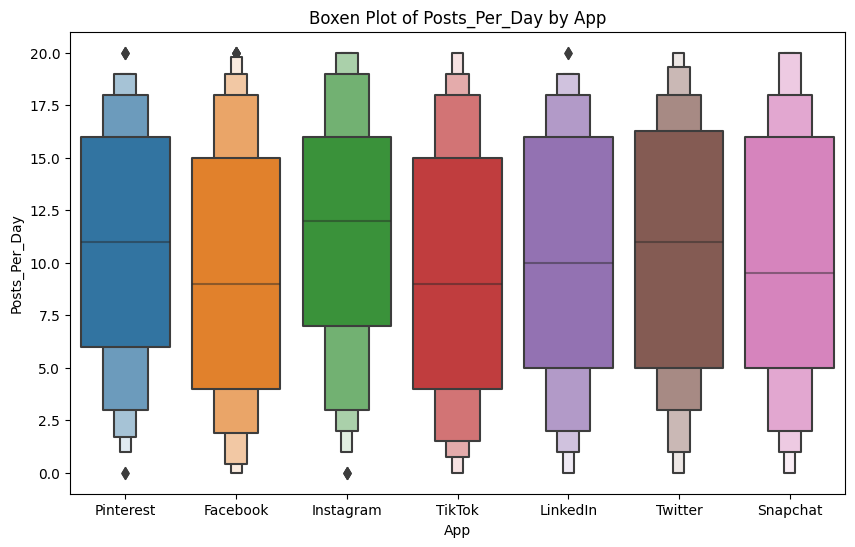

In [18]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x="App", y="Posts_Per_Day", data=df)
plt.title("Boxen Plot of Posts_Per_Day by App")
plt.show()

In [19]:
# Group by 'Daily_Minutes_Spent', summing the 'Apabsp' counts
grouped_df = df.groupby("Daily_Minutes_Spent")["App"].count().reset_index()

# Sort the DataFrame by the 'App' counts in descending order
sorted_df = grouped_df.sort_values(by="App", ascending=False)

# Display the sorted DataFrame
print(sorted_df)


     Daily_Minutes_Spent  App
376                  435    6
61                    76    6
211                  246    6
254                  295    6
112                  130    6
..                   ...  ...
145                  174    1
144                  173    1
143                  172    1
316                  364    1
434                  500    1

[435 rows x 2 columns]


In [20]:
# Daily spent Time  on the App
pd.crosstab(df["App"],df['Daily_Minutes_Spent'],normalize = "columns")*100

Daily_Minutes_Spent,5,6,7,8,9,10,11,12,13,14,...,491,492,493,494,495,496,497,498,499,500
App,,,,,,,,,,,,,,,,,,,,,
Facebook,0.0,0.0,0.000000,50.0,0.0,25.0,0.0,0.0,0.0,0.0,...,0.0,33.333333,0.0,0.0,0.000000,50.0,100.0,66.666667,0.0,0.0
Instagram,0.0,50.0,66.666667,0.0,0.0,50.0,0.0,0.0,0.0,0.0,...,25.0,0.000000,0.0,0.0,33.333333,50.0,0.0,0.000000,100.0,0.0
LinkedIn,50.0,0.0,0.000000,25.0,0.0,0.0,0.0,50.0,0.0,0.0,...,0.0,16.666667,0.0,0.0,66.666667,0.0,0.0,0.000000,0.0,0.0
Pinterest,0.0,0.0,33.333333,0.0,0.0,25.0,50.0,0.0,0.0,0.0,...,25.0,16.666667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,100.0
Snapchat,0.0,0.0,0.000000,0.0,100.0,0.0,0.0,50.0,0.0,100.0,...,25.0,16.666667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
TikTok,50.0,0.0,0.000000,25.0,0.0,0.0,50.0,0.0,0.0,0.0,...,0.0,0.000000,50.0,0.0,0.000000,0.0,0.0,33.333333,0.0,0.0
Twitter,0.0,50.0,0.000000,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,25.0,16.666667,50.0,100.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [21]:
df.groupby(["Daily_Minutes_Spent"])["App"].sum()

Daily_Minutes_Spent
5                      LinkedInTikTok
6                    TwitterInstagram
7         PinterestInstagramInstagram
8      LinkedInFacebookTikTokFacebook
9                            Snapchat
                    ...              
496                 FacebookInstagram
497                          Facebook
498            FacebookFacebookTikTok
499                         Instagram
500                         Pinterest
Name: App, Length: 435, dtype: object

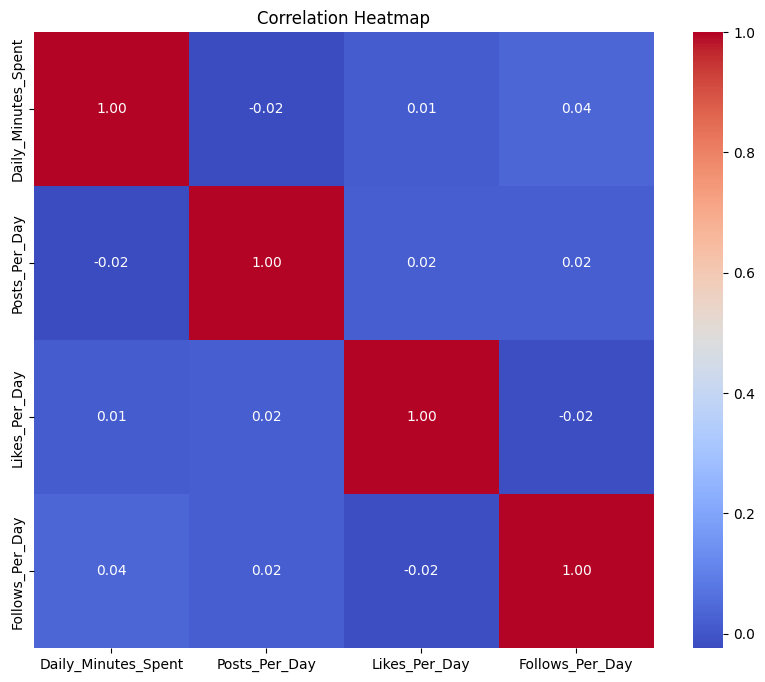

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# In this notebook, we explored and analyzed a dataset on social media usage.  
# If You like this notebook give me an upvote

# Thank you for visiting my notebook